# Correlation matrix between oxides and elements

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame, random_cov_matrix
import pyrolite.plot
from pyrolite.plot import pyroplot
import sklearn

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potentially wrong underline length... 
Note 
----- in 
Plots spidergrams for trace elements data. Additional arguments are typically forwarded
to respective :mod:`matplotlib` functions :func:`~matplotlib.pyplot.plot` and... in the docstring of spider in /Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/pyrolite/plot/spider.py.
  warn(msg)
/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potentially wrong underline length... 
Parameters 
----------- in 
Method for plotting histograms (mode='hist2d'|'hexbin') or kernel density
esitimates from point data. Convenience access function to... in the docstring of density in /Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/pyrolite/plot/__init__.py.
  warn(msg)
/Users/paolotheultimate/anaconda3/lib/python3.7/site-packages/numpydoc/docscrape.py:434: UserWarning: potent

In [2]:
#Getting data from csv (This study's data):
geochem_data = pd.read_csv('../data/geochem_data.csv', header=0)
geochem_data.head()

,Sample,Point No.,Line,K2O,CaO,TiO2,SiO2,Al2O3,Na2O,MgO,FeO,MnO,Cl,SO3,P2O5,Total
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,0.00,0.05,NaN,98.85
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39


In [8]:
#Renaming Columns of oxides to acocmodate subscripts
ox_labels = ['K$_2$O', 'CaO', 'TiO$_2$','SiO$_2$','Al$_2$O$_3$', 'Na$_2$O', 
             'MgO', 'FeO', 'MnO','Cl','SO$_3$','P$_2$O$_5$']

geochem_data.columns=['Sample','Point No.','Line', *ox_labels, 'Total']
geochem_data.head()

,Sample,Point No.,Line,K$_2$O,CaO,TiO$_2$,SiO$_2$,Al$_2$O$_3$,Na$_2$O,MgO,FeO,MnO,Cl,SO$_3$,P$_2$O$_5$,Total
0,D1_sph1,1,3837 G,0.86,21.26,0.62,51.57,13.85,2.46,4.29,4.55,0.16,0.01,0.02,NaN,99.65
1,D1_sph1,2,3838 G,0.61,24.94,0.60,48.62,12.88,1.80,4.52,4.86,0.12,0.00,0.25,NaN,99.21
2,D1_sph1,3,3839 G,1.34,17.58,0.63,54.09,13.99,3.07,3.66,4.34,0.13,0.00,0.05,NaN,98.85
3,D1_sph1,4,3840 G,0.91,19.85,0.65,52.31,13.84,2.59,3.99,4.90,0.13,0.00,0.16,NaN,99.34
4,D1_sph1,5,3841 G,0.89,21.10,0.64,50.91,13.55,2.30,4.34,4.48,0.11,0.00,0.07,NaN,98.39


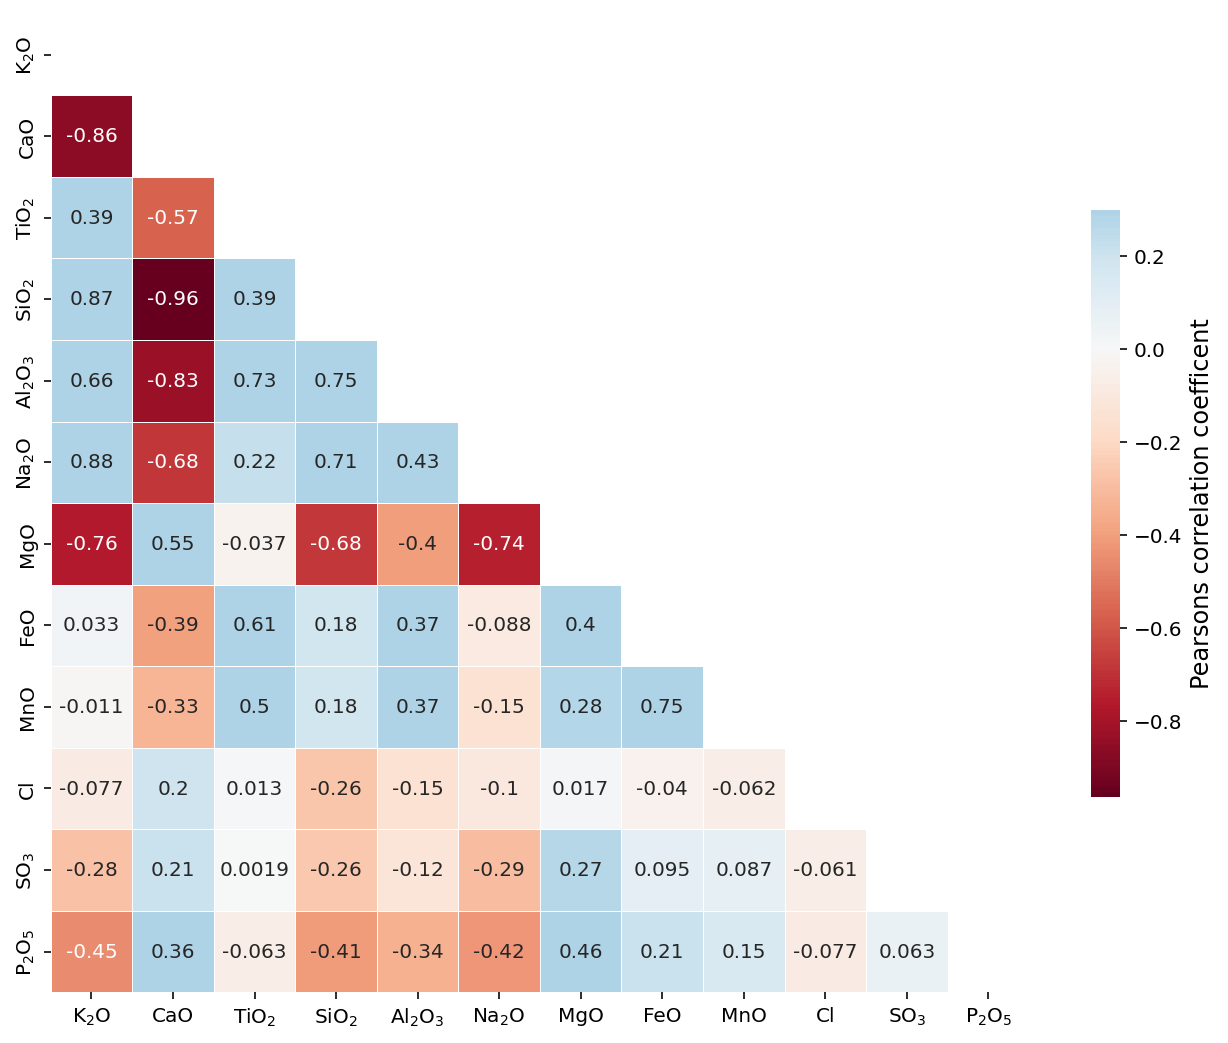

In [25]:
#Getting correlation matrix of all points in tektites 

corr=geochem_data.corr(method='pearson')
corr.drop(['Point No.','Total'],axis=1,inplace=True)
corr.drop(['Total','Point No.'],axis=0,inplace=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap='BrBG'
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .6,'label':'Pearsons correlation coefficent'},annot=True)
plt.savefig('Corr_matrix.png',format='png') 